In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
x = np.genfromtxt(r"C:\Users\crist\Documents\FACULTATE\ANUL 3\SEMNALE\LAB\LAB 5\archive\Train.csv", delimiter=',', skip_header=1, usecols = 2)

In [4]:
print(x)
print(type(x))

[  8.   2.   6. ... 702. 580. 534.]
<class 'numpy.ndarray'>


In [6]:
#a
#nr de masini masurat din ora in ora
#=> fs = 1/1h = 1/3600 Hz

fs = 1/3600 #HZ
print(fs)

0.0002777777777777778


In [7]:
#b ce interval de timp acopera esantioanele din fisier?

print(len(x))
#18289

#18289 esantioane, cate unul pt fiecare ora
#=>

ts = 1/fs
perioada_acoperita = len(x) * ts
print(f"Perioada acoperita: {perioada_acoperita}s sau {len(x)} ore sau {len(x)/24} zile sau {len(x)/24/265} ani")

18288
Perioada acoperita: 65836800.0s sau 18288 ore sau 762.0 zile sau 2.8754716981132074 ani


In [8]:
#c semnal esantionat corect (fara aliere)
#Frecventa maxima prezenta in semnal?

#fs > 2* B

B = fs/2 # 1 / 3600 / 2 = 1/7200
print(f"Frecventa maxima prezenta in semnal: {B} Hz")


Frecventa maxima prezenta in semnal: 0.0001388888888888889 Hz


[138.95811461  66.85385766  35.21917298 ...   0.39618267   0.41367487
   0.37676309]


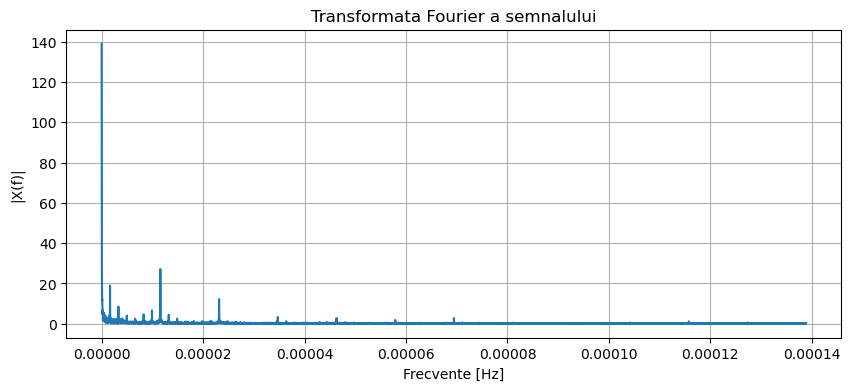

In [9]:
#d transformata Fourier a semnalului
#  afisez grafic modulul transformatei
N = len(x)

X = np.fft.fft(x)
X = abs(X/N)
X = X[:N//2]
print(X)

f = fs * np.linspace(0, N/2, N//2) / N
#        N//2 puncte uniform distribuite intre 0 si N/2


plt.figure(figsize=(10,4))
plt.plot(f, X)
plt.xlabel("Frecvente [Hz]")
plt.ylabel("|X(f)|")
plt.title("Transformata Fourier a semnalului")
plt.grid(True)
plt.savefig("d_FT_semnal.pdf")
plt.show()

(2541266+0j)
[5.81861768e-15 6.68538577e+01 3.52191730e+01 ... 3.96182666e-01
 4.13674870e-01 3.76763091e-01]


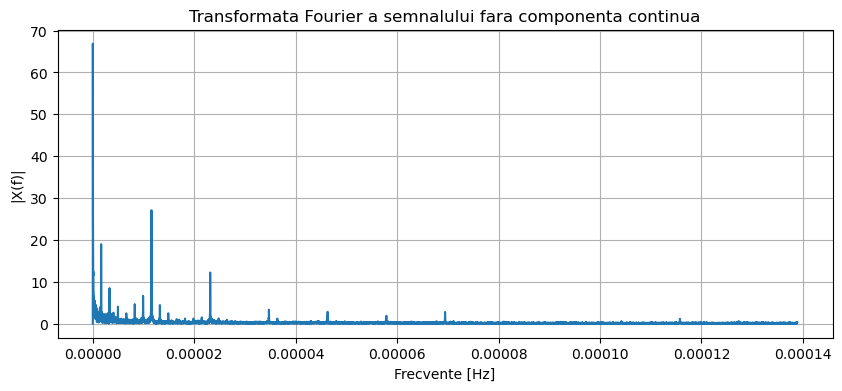

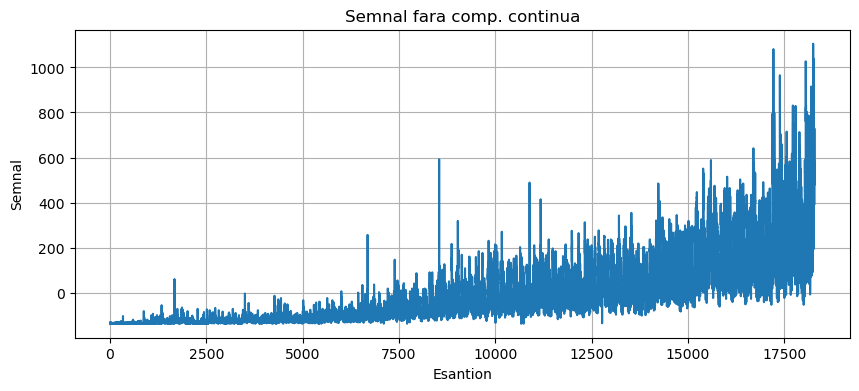

5.818617678665387e-15


In [25]:
#e

#Am componenta continua in semnal daca modulul transformatei are o valoare semnificativa pt frecv 0Hz

print(X[0]) #138.95811461067368 => Prezinta o comp continua

x_no_comp_continua = x - np.mean(x) # elimin comp continua
N = len(x_no_comp_continua)

X = np.fft.fft(x_no_comp_continua)
X = abs(X/N)
X = X[:N//2]
print(X)

f = fs * np.linspace(0, N/2, N//2) / N
#        N//2 puncte uniform distribuite intre 0 si N/2


plt.figure(figsize=(10,4))
plt.plot(f, X)
plt.xlabel("Frecvente [Hz]")
plt.ylabel("|X(f)|")
plt.title("Transformata Fourier a semnalului fara componenta continua")
plt.grid(True)
plt.savefig("e_FT_fara_comp_continua.pdf")
plt.show()


plt.figure(figsize=(10,4))
plt.plot(np.arange(0, len(x), 1), x_no_comp_continua)
plt.xlabel("Esantion")
plt.ylabel("Semnal")
plt.title("Semnal fara comp. continua")
plt.grid(True)
plt.savefig("e_semnal_fara_comp_continua.pdf")
plt.show()
print(X[0]) # da aprox. 0 => nu mai prezinta comp continua


In [ ]:

#f       
# frecventele principale continute in semnal = primele 4 cele mai mari valori 
indices = np.argsort(X)[-5:-1][::-1]  
print(indices)
for i in indices:
    print(f"Frecventa: {f[i]:.5e} Hz, |X| = {X[i]:.5f}")
    
#Caror fenomene periodice din semnal se asociaza fiecare?

#cel mai mare |X| -> fluctuatia nr de masini ziua - noaptea
#urmatorul        ->            in timpul sapt vs in weekend
#                 ->            pe luna

# [  2 762   3 109]
# Frecventa: 3.03815e-08 Hz, |X| = 35.21917
# Frecventa: 1.15753e-05 Hz, |X| = 27.10202
# Frecventa: 4.55722e-08 Hz, |X| = 25.21992
# Frecventa: 1.65579e-06 Hz, |X| = 19.00047


[  2 762   3 109]
Frecventa: 3.03815e-08 Hz, |X| = 35.21917
Frecventa: 1.15753e-05 Hz, |X| = 27.10202
Frecventa: 4.55722e-08 Hz, |X| = 25.21992
Frecventa: 1.65579e-06 Hz, |X| = 19.00047


Cea mai pregnanta frecventa: index 2 in vectorul de frecvente analizate, f2 = 3 * 10^-8

Next:                        index 762                                   f762 = 1157 * 10^-8

Next:                        index 3                                     f3 = 4.5 * 10^-8

Next:                        index 109                                   f109 = 165 * 10^-8


fs = 1/3600 = 27.7 * 10^-5 = 27777.7 * 10^-8




f2 e ceva ce se intampla de fs / f2 = 27777.7/3 = 9259.23 ori mai rar decat esantionez eu.

Eu esantionez din ora in ora.

De 9000 de ori mai rar decat "o data pe ora" inseamna 9000/24 = 375 => o data pe an.

Frecventa f2 corespunde fluxului de masini intr- un an.

-------------------------------------------------------------------------------------------------


f762 e ceva ce se intampla de fs / f762 = 27777.7/1157 = 24 ori mai rar decat esantionez eu.

Eu esantionez din ora in ora.

De 24 de ori mai rar decat "o data pe ora" inseamna 24/24 = 1 => o data pe zi.

Frecventa f762 corespunde fluxului de masini intr-o zi.

-------------------------------------------------------------------------------------------------


f3 e ceva ce se intampla de fs / f3 = 27777.7/4.5 = 6172.82 ori mai rar decat esantionez eu.

Eu esantionez din ora in ora.

De 6172.82 de ori mai rar decat "o data pe ora" inseamna 6172.82/24 = la 257 zile = 8.56 luni

//257/365 = 0.7

Frecventa f2 corespunde unui eveniment care se intampla o data la 8.5 luni.

-------------------------------------------------------------------------------------------------


f109 e ceva ce se intampla de fs / f109 = 27777.7/165 = 168.34 ori mai rar decat esantionez eu.

Eu esantionez din ora in ora.

De 168.34 de ori mai rar decat "o data pe ora" inseamna 168.34/24 = la 7 zile = 1 data pe saptamana

Frecventa f109 corespunde unui eveniment care se intampla o data pe saptamana = evenimentul periodic "variatia fluxului de masini intr-o saptamana".

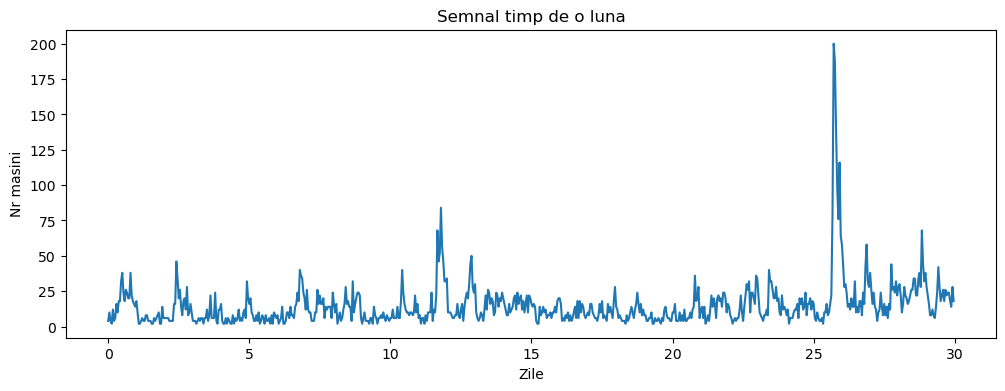

In [24]:
#g 
# incep de la un esantion ales de mine > 1000
# vreau sa fisez o luna de trafic si sa incep dintr-o zi de luni

start = 1056 # 8-10-2012 e prima zi de luni de dupa esantionul 1000
end = start + 24*30
plt.figure(figsize=(12,4))
plt.plot(np.arange(0, len(x[start:end]), 1)/24, x[start:end])
plt.xlabel("Zile")
plt.ylabel("Nr masini")
plt.title("Semnal timp de o luna")
plt.savefig("g_trafic_o_luna.pdf")
plt.show()


#h nu stiu in ce zi a inceput inregistrarea semnalului


Am observat ca in semnalul nostru exista o componenta de frecventa zilnica, una saptamnala si una anuala.

Plimb un sliding window de dimensiune 7 * 24 esantioane (o saptamana in ore) peste semnal.
Caut patternul: 5 varfuri si 2 platouri, corespunzand zilelor lucratoare vs weekend.
Cand am gasit, consider esantionul i care deschide sliding window-ul ora 0 a unei zile de luni.
De la esantionul i, cu pasul +7*24 pot naviga la urmatoarea zi de luni, apoi la urmatoarea etc.

Astfel as putea determina carei zile a saptamanii corespunde primul esantion.

Pentru a lucra mai usor cu semnalul as putea chiar, dupa stabilirea ferestrelor saptamanilor sa fac media pe cate 24 de ore pt a obtine esantionare pe zi, in loc de esantionare pe ora si a vedea mai bine zilele.

Avand la dispozitie aprox. 2 ani de date, as putea chiar sa fac media de trafic a fiecarei date din calendar, pentru cei 2 ani.

ex
x_mean[23_aug] = x_an1[23_aug] + x_an2[23_aug] / 2

Apoi folosesc componenta anuala: caut un minim care apare o data pe an (zi libera, sarbatoare etc.), sau perioade cu trafic scazut (vacanta de vara, de iarna etc.) Daca acest reper apare la k zile de la inceputul semnalului, atunci data reala de start este data_reper-k zile.

Neajunsuri: 
- metoda depinde de existenta unei periodicitati clare, sigure
- evenimente neobisnuite pot crea minime false - ex: lockdown in pandemie
- cu putini ani de date, mediile s-ar putea sa nu fie foarte relevante
- nu se poate obtine data exacta, ci doar o aproximare

18288
9144


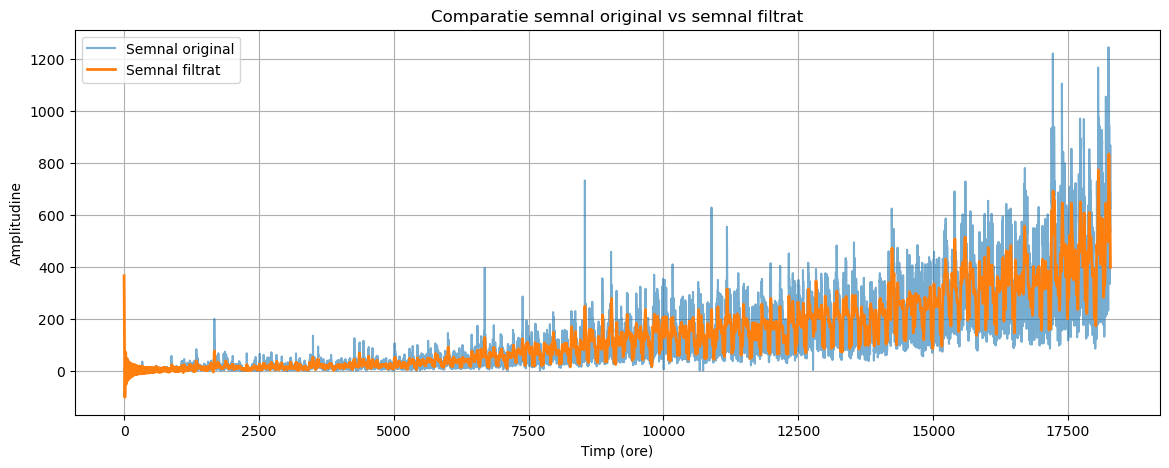

Numar de frecvente eliminate:  8485


In [12]:
#i 

#  componentele de frcv inalta -> la mijlocul transformatei
#  Daca fac un element 0 -> ii fac si perechea 0
#  Fac IFFT

X = np.fft.fft(x)
# X = abs(X/N)

f = fs * np.linspace(0, N/2, N//2) / N


X_curatat = X.copy()
print(len(X_curatat))

# Cf. ex. f, Frecventa: 1.15753e-05 Hz, |X| = 27.10202    -    corespunde unui eveniment periodic cu perioada de o zi
# Vreau sa elimin frecventele mai mari decat aceasta
f_cut = 1e-5   #pragul de la care elimin frecventele inalte

counter = 0
print(len(f))
for i in range(1, len(f)):
    if f[i] > f_cut:
        X_curatat[i] = 0
        X_curatat[len(X_curatat) - i] = 0
        counter+=1

x_curatat = np.fft.ifft(X_curatat).real # IFFT ca sa reconstruiesc semnalul x


plt.figure(figsize=(14,5))
plt.plot(x, label='Semnal original', alpha=0.6)
plt.plot(x_curatat, label='Semnal filtrat', linewidth=2)
plt.legend()
plt.title("Comparatie semnal original vs semnal filtrat")
plt.xlabel("Timp (ore)")
plt.ylabel("Amplitudine")
plt.grid(True)
plt.savefig("i_semnal_filtrat.pdf")
plt.show()

print("Numar de frecvente eliminate: ", counter)

#Explicatie: am eliminat toate frecventele mai mari decat frecventa fluxului de masini intr o zi
